<a href="https://colab.research.google.com/github/sturu1/git-first/blob/master/Copy_of_sung_lec02_multilinear_regression(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mutiple Regression 실습(1)

> multiple regression(다중회귀분석)이란것은 앞에서 배운 단순(simple) 회귀분석을 **입력변수가 여러개**일때로 확장한 개념입니다. 
예를 들면 입력변수가 3개일때는 수학적으로 다음과 같은 표현이 되겠죠. 
`
y=w1*x1 + w2*x2 + w3*x3 +b
`

> 이번 실습에서는 출석, 중간, 기말성적 이라는 3가지 속성(입력변수 3개)을 이용하여 최종 성적(출력변수 1개)을 예측하는 모델을 구축해 보도록 하겠습니다. 

> 먼저 deep learning 모듈인 keras와 데이터 조작을 위한 모듈인 numpy를 불러옵니다. 

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

> 다음으로 학습을 위한 데이터를 변수에 저장합니다. 
아래서 보는바와 같이 입력데이터는 5개의 개체(sample)가 있으며, 각 개체별로 3개의 변수(속성)를 갖고 있습니다. 즉, 5명의 학생이 있고, 3개의 속성(출석점수, 중간성적, 기말성적)으로 입력데이터가 구성되어 있습니다. 
또한 출력데이터는 5개의 개체와 각 개체별 1개의 속성으로 구성되어 있습니다. 즉, 각 학생별 최종성적입니다. 

In [0]:
x_data = np.array([[73., 80., 75.],
                   [93., 88., 93.],
                   [89., 91., 90.],
                   [96., 98., 100.],
                   [73., 66., 70.]])
y_data = np.array([[152.],
                   [185.],
                   [180.],
                   [196.],
                   [142.]])

> 입출력 데이터의 확인을 위해, 각 입출력 변수의 자료 모양을 확인해 봅니다. 

In [16]:
x_data.shape, y_data.shape

((5, 3), (5, 1))

> 다음은, keras에 내표된 Sequential() 클래스를 사용하여 모델 instance를  만듭니다. Sequential()은 신경망을 순차적으로 (layer by layer) 구성하기 위하여 사용하는 함수(클래스)로 우리 강의의 대부분의 예제에서 활용합니다. 

In [0]:
model=Sequential()

> 생성된 model instance는 현재 비어 있습니다. 여기에 신경망의 층(layers)과 셀(unit)을 추가할 수 있습니다. 

> 우리는 단순히 **한개의 layer**와 **한개의 unit**으로 구성된 아주 단순한 신경망을 구성하겠습니다. 마치 하나의 세포(뉴런)으로만 구성된 뇌와 같습니다. 

> 이때, 입력데이터의 각 개체의 모양을 input_shape로 정의하는 것이 필요합니다. input 데이터는 5개의 개체(5명의 학생)로 이루어져 있지만, 한 개체는 3개의 속성을 가지고 있으므로 **inpu_shape는 1D 벡터인 (3,)**로 지정합니다. 또는 input_dim=3 으로 표현하기도 합니다. 

In [0]:
model.add(Dense(units=1, input_shape=(3, )))


> 참고로 윗 코드는 다음과 같이 표현 가능
```
model=Sequential()
model.add(Dense(units=1,input_dim=3))
```

> **모델을 생성**하고, **네트워크의구조를 정의**했으면 다음으로 **모델을 compile** 해야 합니다. 이때 **손실함수와 optimizer를 정의**해야 합니다. 

> 이 예제에서는 optimizer로 rmsprop 알고리즘을 사용했습니다. 또한 이 예제가 숫자를 예측하는 회귀분석 이므로 손실함수로 mse(평균제곱오차, Mean Squared Error)를 사용했군요. 참고로, optimizer로 사용할수 있는 알고리즘은 여러가지가 있는데 가장 대표적으로 RMSprop나 SGM, Adam 등이 있습니다. 

In [0]:
model.compile(optimizer=RMSprop(lr=0.1), loss='mse')

> 이제 모델의 구축은 끝났습니다. 지금까지 구축한 모델의 요약정보를 확인해 봅니다. 

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


> 우리가 구성한 모델은 1개의 층으로 이루어져 있으며 (layer에 dense_1 하나만 존재), 출력 데이터의 형태는 1개의 속성으로 구성됩니다. 또한 총 4개의 파라미터가 있는데 아래 식의 w1, w2, w3와 b가 되겠죠. `y= w1*x1 + w2*x2 + w3*x3 + b`

> 이제 모델을 100회에 걸쳐서 학습시킵니다(epochs = 100). 참고로 주어진 입력데이터를 모두 사용하여 한번 학습시킬때 epochs=1이 됩니다. 


> 학습 과정에서 mse인 손실 함수의 값이 점차 감소하는 것을 알 수 있습니다. 

In [26]:
history = model.fit(x_data, y_data, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 38ms/step - loss: 9864.5879
Epoch 2/100
5/5 [==============================] - 0s 313us/step - loss: 319.1887
Epoch 3/100
5/5 [==============================] - 0s 301us/step - loss: 11.7118
Epoch 4/100
5/5 [==============================] - 0s 299us/step - loss: 4.7910
Epoch 5/100
5/5 [==============================] - 0s 318us/step - loss: 4.7112
Epoch 6/100
5/5 [==============================] - 0s 330us/step - loss: 4.7056
Epoch 7/100
5/5 [==============================] - 0s 563us/step - loss: 4.6998
Epoch 8/100
5/5 [==============================] - 0s 573us/step - loss: 4.6938
Epoch 9/100
5/5 [==============================] - 0s 364us/step - loss: 4.6874
Epoch 10/100
5/5 [==============================] - 0s 335us/step - loss: 4.6807
Epoch 11/100
5/5 [==============================] - 0s 275us/step - loss: 4.6737
Epoch 12/100
5/5 [==============================] - 0s 255us/step - loss: 4.6663
Epoch 13/100
5/5 [==============

> model의 weight 값을 아래와 같이 확인할 수 있습니다. > 즉, `w1`, `w2`, `w3` 값과, `b` 값에 해당합니다. 

In [27]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[1.4842305 ],
        [0.17180961],
        [0.21208096]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.28987008], dtype=float32)>]

> 학습이 진행되는 동안 손실값은 history.history라는 변수에 dictionary 형태로 저장되어 있습니다. 따라서 여러분은 다음과 같이 100번의 반복동안 손실함수의 값(mse)을 확인할 수 있습니다. 

In [0]:
import matplotlib.pyplot as plt

> 다음으로 학습이 진행되면서 (epochs이 진행되면서) 손실값의 변화를 그래프로 그려보겠습니다. 

> 그래프를 그리는 도구인 matplotlib 모듈을 사용하겠습니다. 



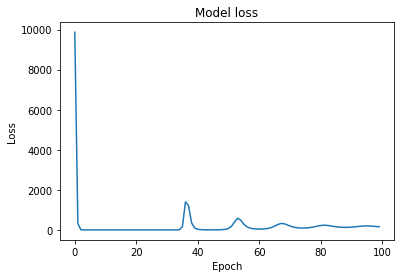

In [31]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

> 모델의 학습이 끝났으니, 새로운 데이터에 대한 예측을 수행해 볼까요? 

In [35]:
model.predict(np.array([[95,88,60],[67,99,70]]))

array([[169.13586],
       [131.58813]], dtype=float32)